In [49]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import pathlib

fig_w,fig_h = 20,10
plt.rcParams['figure.figsize'] = [fig_w,fig_h]
AUTOTUNE = tf.data.experimental.AUTOTUNE
print(os.getcwd())

C:\Ariel\NLP_DNN_course\NLP_course


In [50]:
data_fld = os.path.join('data','mini_data')
mask_fld = os.path.join('data','mini_data','masks')
CLASS_NAMES = [x for x in os.listdir(data_fld)]
IMG_WIDTH, IMG_HEIGHT = 525,350

data_root = pathlib.Path(data_fld)

data_df = pd.read_csv('data/train.csv')
data_df = data_df[data_df['EncodedPixels'].isnull()==False]

print("Labels:", CLASS_NAMES)

Labels: ['Fish', 'Flower', 'Gravel', 'Sugar']


In [51]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

print('Img#',len(all_image_paths))
all_image_paths[:10]

Img# 11836


['data\\mini_data\\Fish\\0011165.jpg',
 'data\\mini_data\\Fish\\002be4f.jpg',
 'data\\mini_data\\Fish\\0031ae9.jpg',
 'data\\mini_data\\Fish\\003994e.jpg',
 'data\\mini_data\\Fish\\006bf7c.jpg',
 'data\\mini_data\\Fish\\006c5a6.jpg',
 'data\\mini_data\\Fish\\008a5ff.jpg',
 'data\\mini_data\\Fish\\009e2f3.jpg',
 'data\\mini_data\\Fish\\00bea06.jpg',
 'data\\mini_data\\Fish\\00dec6a.jpg']

In [52]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Fish', 'Flower', 'Gravel', 'Sugar']

In [53]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'Fish': 0, 'Flower': 1, 'Gravel': 2, 'Sugar': 3}

In [54]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel


In [56]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

Text(0.5, 1.0, 'Fish')

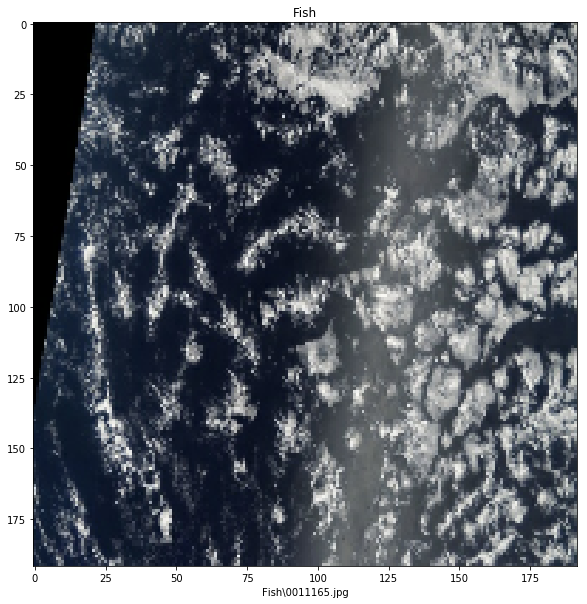

In [57]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())

In [58]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print('shape:',repr(path_ds.output_shapes))
print('type:',path_ds.output_types)
print(path_ds)

shape: TensorShape([])
type: <dtype: 'string'>
<DatasetV1Adapter shapes: (), types: tf.string>


In [59]:
image_ds = path_ds.map(load_and_preprocess_image,num_parallel_calls=AUTOTUNE)

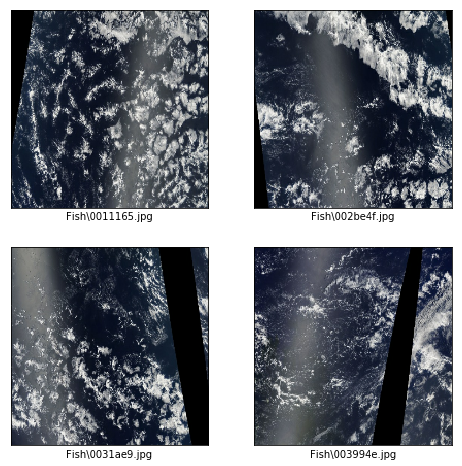

In [60]:
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
plt.show()

In [61]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [62]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
image_count = len(all_image_paths)
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [71]:
## Build Cnn

0
0
0
0
0
